In [2]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully!")
print(f"📊 NumPy      version: {np.__version__}")
print(f"🐼 Pandas     version: {pd.__version__}")
print(f"🎨 Matplotlib version: {plt.matplotlib.__version__}")
print(f"📈 Seaborn    version: {sns.__version__}")

✅ All libraries imported successfully!
📊 NumPy      version: 2.0.2
🐼 Pandas     version: 2.2.3
🎨 Matplotlib version: 3.10.0
📈 Seaborn    version: 0.13.2


## 🎲 **Dataset Creation & Exploration**

📊 Dataset Summary:
Ideal     Dataset : 300 samples, 2 features
Challenge Dataset : 500 samples, 2 features
Iris      Dataset : 150 samples, 4 features
Iris Features     : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


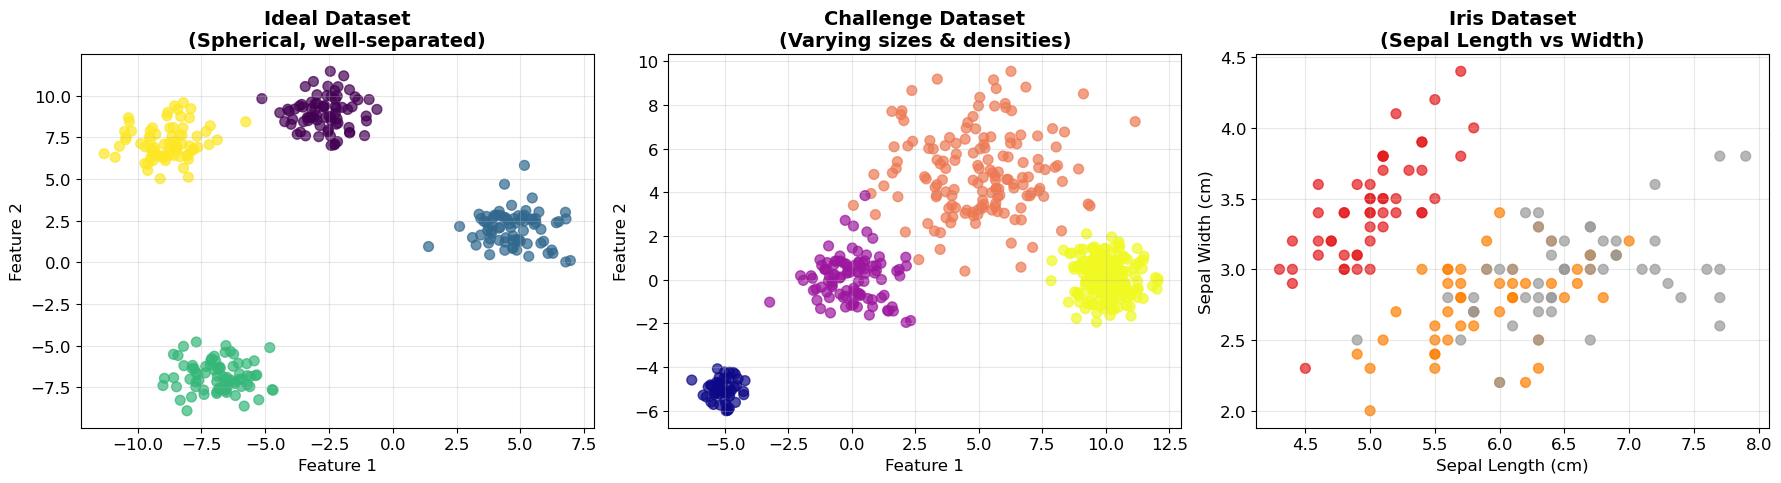

In [6]:
# Create synthetic datasets for different scenarios
np.random.seed(42)

# Dataset 1: Ideal for K-Means (spherical, well-separated clusters)
X_ideal, y_ideal = make_blobs(n_samples=300, centers=4, cluster_std=1.0, center_box=(-10.0, 10.0), random_state=42)

# Dataset 2: Challenging for K-Means (varying densities and sizes)
X_challenge, y_challenge = make_blobs(n_samples=[50, 100, 150, 200], centers=[(-5, -5), (0, 0), (5, 5), (10, 0)], cluster_std=[0.5, 1.0, 2.0, 0.8], random_state=42)

# Load real-world dataset: Iris
iris = load_iris()
X_iris = iris.data
y_iris_true = iris.target
feature_names = iris.feature_names

print("📊 Dataset Summary:")
print(f"Ideal     Dataset : {X_ideal.shape[0]} samples, {X_ideal.shape[1]} features")
print(f"Challenge Dataset : {X_challenge.shape[0]} samples, {X_challenge.shape[1]} features")
print(f"Iris      Dataset : {X_iris.shape[0]} samples, {X_iris.shape[1]} features")
print(f"Iris Features     : {feature_names}")

# Visualize the datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Ideal dataset
axes[0].scatter(X_ideal[:, 0], X_ideal[:, 1], c=y_ideal, cmap='viridis', alpha=0.7, s=50)
axes[0].set_title('Ideal Dataset\n(Spherical, well-separated)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(alpha=0.3)

# Plot 2: Challenge dataset
axes[1].scatter(X_challenge[:, 0], X_challenge[:, 1], c=y_challenge, cmap='plasma', alpha=0.7, s=50)
axes[1].set_title('Challenge Dataset\n(Varying sizes & densities)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(alpha=0.3)

# Plot 3: Iris dataset (first two features)
axes[2].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris_true, cmap='Set1', alpha=0.7, s=50)
axes[2].set_title('Iris Dataset\n(Sepal Length vs Width)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Sepal Length (cm)')
axes[2].set_ylabel('Sepal Width (cm)')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 🔧 **Step-by-Step K-Means Implementation**

🔄 Step 1: Data Preprocessing
📊 Dataset shape  : (300, 2)
📈 Feature ranges : X1 [-11.31, 6.95], X2 [-8.92, 11.48]
✅ Data standardized: Mean ≈ -0.000, Std ≈ 1.000

🎯 Step 2: Determine Optimal Number of Clusters


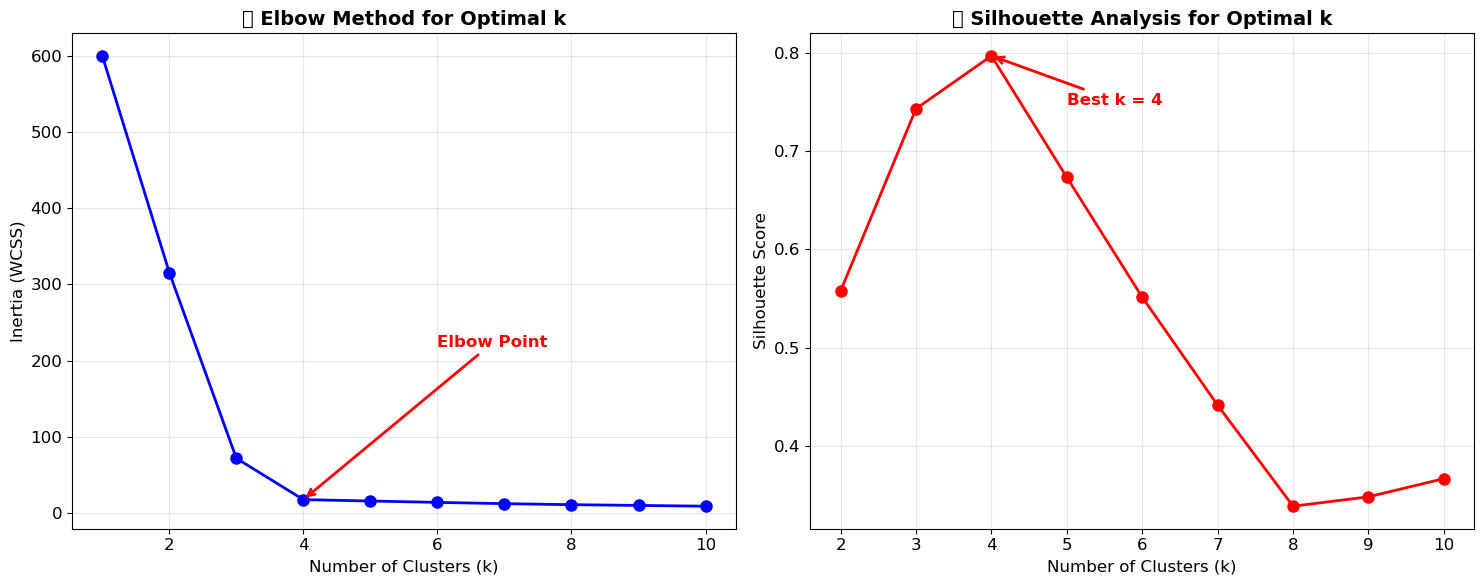

🎯 Recommended k from Silhouette Analysis: 4
📈 Best Silhouette Score: 0.797

⚙️ Step 3: Apply K-Means with Optimal k
✅ K-Means completed successfully!
🔧 Final inertia (WCSS): 17.466
🔄 Number of iterations: 2
📍 Cluster centers (original scale):
   Cluster 0: (-2.71, 8.97)
   Cluster 1: (-6.83, -6.83)
   Cluster 2: (4.72, 2.04)
   Cluster 3: (-8.87, 7.17)

📊 Step 4: Analyze Cluster Characteristics
📈 Cluster Statistics:


Feature_1              Feature_2       
             mean    std count      mean    std
Cluster                                        
0          -2.710  0.947    76     8.971  0.979
1          -6.832  1.012    75    -6.830  0.898
2           4.718  1.040    75     2.042  1.014
3          -8.874  0.919    74     7.175  0.996


📊 Clustering Quality Metrics:
   🎯 Silhouette Score        : 0.797 (Range: [-1, 1], Higher is better)
   📈 Calinski-Harabasz Index : 3290.737 (Higher is better)
   📉 Davies-Bouldin    Index : 0.281 (Lower is better)


In [9]:
# Step 1: Data Preprocessing
print("🔄 Step 1: Data Preprocessing")
print("=" * 50)

# Choose the ideal dataset for demonstration
X = X_ideal.copy()
print(f"📊 Dataset shape  : {X.shape}")
print(f"📈 Feature ranges : X1 [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}], X2 [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

# Standardize the data (recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"✅ Data standardized: Mean ≈ {X_scaled.mean():.3f}, Std ≈ {X_scaled.std():.3f}")

print("\n🎯 Step 2: Determine Optimal Number of Clusters")
print("=" * 50)

# Method 1: Elbow Method
k_range = range(1, 11)
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Method 2: Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):  # Silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Visualize both methods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (WCSS)', fontsize=12)
ax1.set_title('📈 Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.annotate('Elbow Point', xy=(4, inertias[3]), xytext=(6, inertias[3] + 200),arrowprops=dict(arrowstyle='->', color='red', lw=2),fontsize=12, color='red', fontweight='bold')

# Silhouette Method
ax2.plot(range(2, 11), silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('📊 Silhouette Analysis for Optimal k', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)
best_k = range(2, 11)[np.argmax(silhouette_scores)]
ax2.annotate(f'Best k = {best_k}', xy=(best_k, max(silhouette_scores)),  xytext=(best_k + 1, max(silhouette_scores) - 0.05), arrowprops=dict(arrowstyle='->', color='red', lw=2), fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"🎯 Recommended k from Silhouette Analysis: {best_k}")
print(f"📈 Best Silhouette Score: {max(silhouette_scores):.3f}")

print("\n⚙️ Step 3: Apply K-Means with Optimal k")
print("=" * 50)

# Apply K-Means with optimal k
optimal_k = 4           # Based on true structure and analysis
kmeans_optimal = KMeans(
    n_clusters=optimal_k, 
    init='k-means++',   # Smart initialization
    n_init=10,          # Number of random initializations
    max_iter=300,       # Maximum iterations
    random_state=42
)

# Fit the model and get predictions
cluster_labels = kmeans_optimal.fit_predict(X_scaled)
centroids = kmeans_optimal.cluster_centers_

# Transform centroids back to original scale for interpretation
centroids_original = scaler.inverse_transform(centroids)

print(f"✅ K-Means completed successfully!")
print(f"🔧 Final inertia (WCSS): {kmeans_optimal.inertia_:.3f}")
print(f"🔄 Number of iterations: {kmeans_optimal.n_iter_}")
print(f"📍 Cluster centers (original scale):")
for i, center in enumerate(centroids_original):
    print(f"   Cluster {i}: ({center[0]:.2f}, {center[1]:.2f})")

print("\n📊 Step 4: Analyze Cluster Characteristics")
print("=" * 50)

# Create a DataFrame for analysis
df_results = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df_results['Cluster'] = cluster_labels
df_results['True_Label'] = y_ideal

# Cluster statistics
cluster_stats = df_results.groupby('Cluster').agg({
    'Feature_1': ['mean', 'std', 'count'],
    'Feature_2': ['mean', 'std']
}).round(3)

print("📈 Cluster Statistics:")
display(cluster_stats)

# Calculate various metrics
silhouette_avg    = silhouette_score(X_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
davies_bouldin    = davies_bouldin_score(X_scaled, cluster_labels)

print(f"\n📊 Clustering Quality Metrics:")
print(f"   🎯 Silhouette Score        : {silhouette_avg:.3f} (Range: [-1, 1], Higher is better)")
print(f"   📈 Calinski-Harabasz Index : {calinski_harabasz:.3f} (Higher is better)")
print(f"   📉 Davies-Bouldin    Index : {davies_bouldin:.3f} (Lower is better)")

🎨 Step 5: Visualizing Results


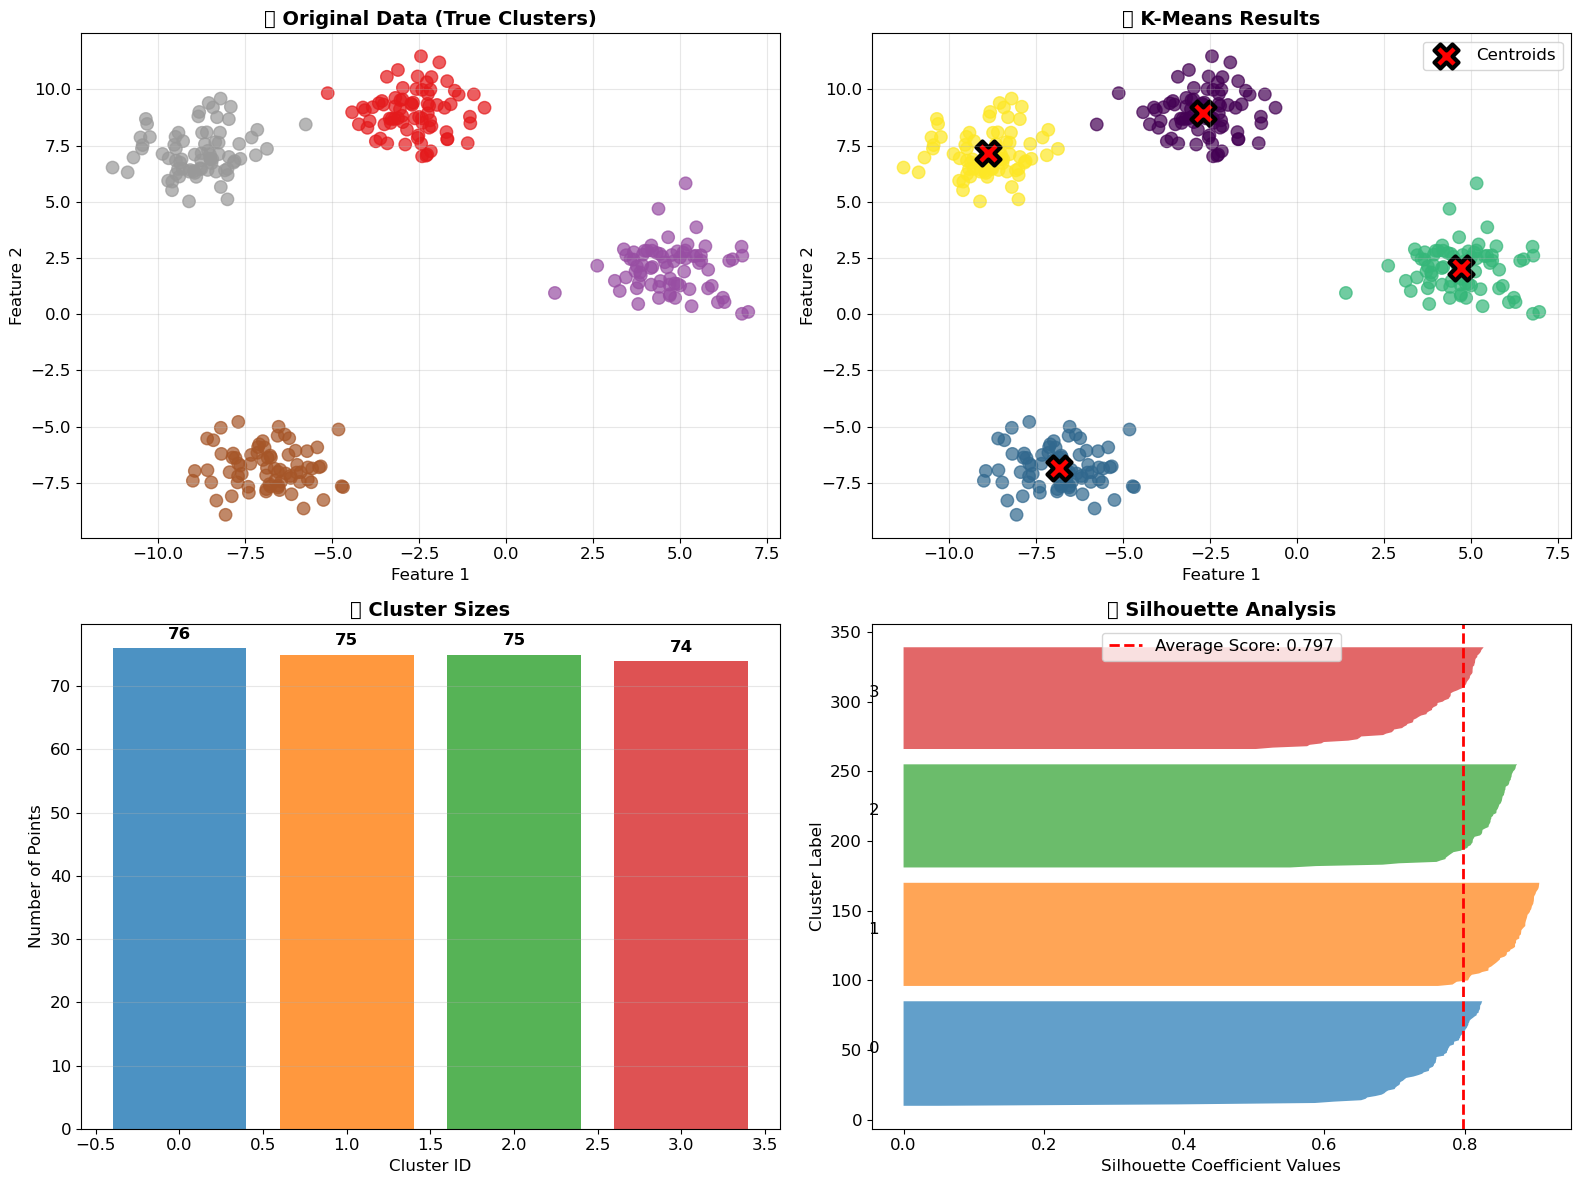


🎯 External Validation (if true labels known):
   📊 Adjusted Rand Index: 0.991 (Range: [0, 1], Higher is better)
   📈 Normalized Mutual Information: 0.987 (Range: [0, 1], Higher is better)

📋 Cluster vs True Label Comparison:


col_0,0,1,2,3,All
row_0,,,,,
0,75,0,0,0,75
1,0,0,75,0,75
2,0,75,0,0,75
3,1,0,0,74,75
All,76,75,75,74,300


In [12]:
# Step 5: Comprehensive Visualization
print("🎨 Step 5: Visualizing Results")
print("=" * 50)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Original Data with True Labels
scatter1 = axes[0, 0].scatter(X[:, 0], X[:, 1], c=y_ideal, cmap='Set1', alpha=0.7, s=80)
axes[0, 0].set_title('🎯 Original Data (True Clusters)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')
axes[0, 0].grid(alpha=0.3)

# Plot 2: K-Means Results
scatter2 = axes[0, 1].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7, s=80)
centroids_plot = axes[0, 1].scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=300, linewidths=3, label='Centroids', edgecolors='black')
axes[0, 1].set_title('🔧 K-Means Results', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Cluster Sizes
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
bars = axes[1, 0].bar(cluster_counts.index, cluster_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=0.8)
axes[1, 0].set_title('📊 Cluster Sizes', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Cluster ID')
axes[1, 0].set_ylabel('Number of Points')
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, cluster_counts.values):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(count), ha='center', va='bottom', fontweight='bold')

# Plot 4: Silhouette Analysis
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(optimal_k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    axes[1, 1].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=colors[i], alpha=0.7)
    
    axes[1, 1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[1, 1].axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2,label=f'Average Score: {silhouette_avg:.3f}')
axes[1, 1].set_title('📈 Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Silhouette Coefficient Values')
axes[1, 1].set_ylabel('Cluster Label')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Additional analysis: Confusion matrix with true labels if available
if 'y_ideal' in locals():
    from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
    
    # Calculate external validation metrics
    ari_score = adjusted_rand_score(y_ideal, cluster_labels)
    nmi_score = normalized_mutual_info_score(y_ideal, cluster_labels)
    
    print(f"\n🎯 External Validation (if true labels known):")
    print(f"   📊 Adjusted Rand Index: {ari_score:.3f} (Range: [0, 1], Higher is better)")
    print(f"   📈 Normalized Mutual Information: {nmi_score:.3f} (Range: [0, 1], Higher is better)")
    
    # Create confusion matrix-like comparison
    comparison_df = pd.crosstab(y_ideal, cluster_labels, margins=True)
    print(f"\n📋 Cluster vs True Label Comparison:")
    display(comparison_df)

<h1 align="center"> <strong>📊 Evaluation Techniques</strong> </h1>

## 🎯 **Clustering Quality Metrics**

Evaluating unsupervised learning results is challenging since we don't have ground truth labels. However, several metrics help assess clustering quality:

### **Internal Metrics (No ground truth needed)**

🔍 K-Means Clustering Evaluation
📊 Basic Statistics:
   🎯 Number of samples: 300
   🏷️ Number of clusters: 4

📈 Internal Metrics (Higher is better except Davies-Bouldin):
   🎯 Silhouette Score        : 0.7975 (Range: [-1, 1])
   📊 Calinski-Harabasz Index : 3290.7373
   📉 Davies-Bouldin    Index : 0.2811 (Lower is better)
   💡 Silhouette Interpretation: Excellent clustering structure

🎯 External Metrics (Compared to true labels):
   📊 Adjusted Rand Index           : 0.9911 (Range: [0, 1])
   📈 Normalized Mutual Information : 0.9872 (Range: [0, 1])
   🏠 Homogeneity                   : 0.9872 (Each cluster contains only single class)
   🔗 Completeness                  : 0.9872 (All class members in same cluster)
   ⚖️ V-Measure                     : 0.9872 (Harmonic mean of homogeneity & completeness)

📊 Cluster Distribution:
   Cluster 0: 76 samples (25.3%)
   Cluster 1: 75 samples (25.0%)
   Cluster 2: 75 samples (25.0%)
   Cluster 3: 74 samples (24.7%)

🔍 Detailed Analysis: Optimal k Se

,k,silhouette,calinski_harabasz,davies_bouldin,inertia
0,2,0.5577,268.7329,0.5766,315.4925
1,3,0.7436,1094.3803,0.3700,71.6883
2,4,0.7975,3290.7373,0.2811,17.4662
3,5,0.6736,2755.7767,0.5925,15.6387
4,6,0.5513,2488.0501,0.8242,13.8524


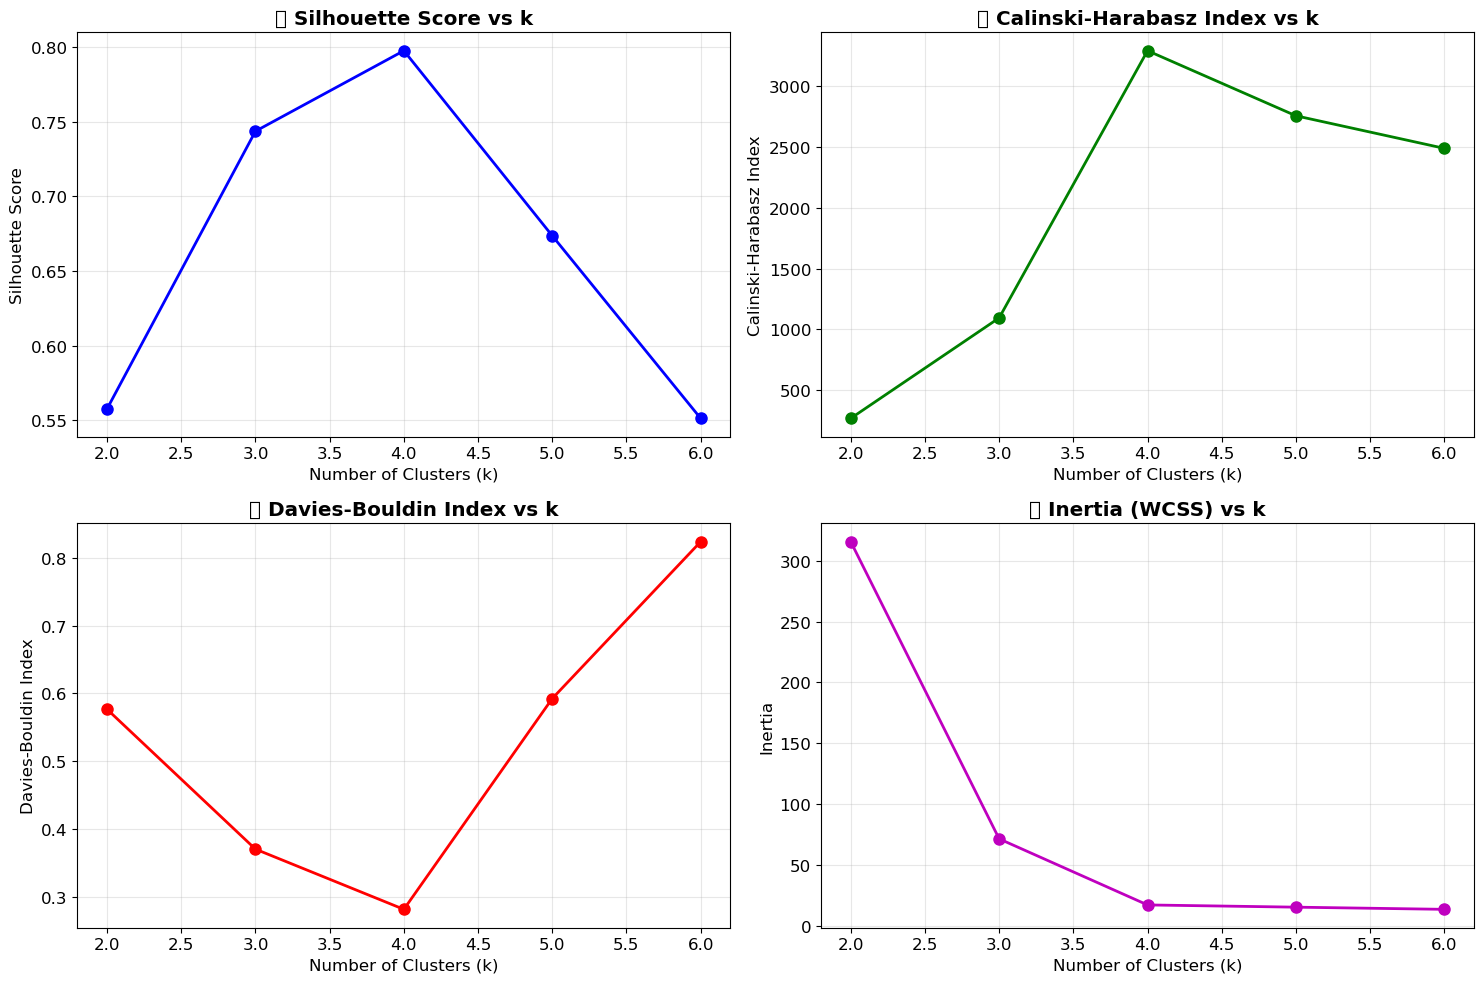


🎯 Metric-based Recommendations:
   📈 Best k by Silhouette Score  : 4
   📊 Best k by Calinski-Harabasz : 4
   📉 Best k by Davies-Bouldin    : 4

✅ Strong consensus: k = 4 is optimal


In [15]:
# Comprehensive Evaluation Function
def evaluate_clustering(X, labels, true_labels=None, algorithm_name="K-Means"):
    """
    Comprehensive evaluation of clustering results
    
    Parameters:
    - X: Feature matrix
    - labels: Predicted cluster labels
    - true_labels: Ground truth labels (optional)
    - algorithm_name: Name of the algorithm for reporting
    """
    print(f"🔍 {algorithm_name} Clustering Evaluation")
    print("=" * 60)
    
    # Basic statistics
    n_clusters = len(np.unique(labels))
    n_samples = len(labels)
    
    print(f"📊 Basic Statistics:")
    print(f"   🎯 Number of samples: {n_samples}")
    print(f"   🏷️ Number of clusters: {n_clusters}")
    
    # Internal metrics
    if n_clusters > 1:
        silhouette_avg = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        
        print(f"\n📈 Internal Metrics (Higher is better except Davies-Bouldin):")
        print(f"   🎯 Silhouette Score        : {silhouette_avg:.4f} (Range: [-1, 1])")
        print(f"   📊 Calinski-Harabasz Index : {calinski_harabasz:.4f}")
        print(f"   📉 Davies-Bouldin    Index : {davies_bouldin:.4f} (Lower is better)")
        
        # Interpret silhouette score
        if silhouette_avg > 0.7:
            interpretation = "Excellent clustering structure"
        elif silhouette_avg > 0.5:
            interpretation = "Good clustering structure"
        elif silhouette_avg > 0.3:
            interpretation = "Weak clustering structure"
        else:
            interpretation = "Poor clustering structure"
        
        print(f"   💡 Silhouette Interpretation: {interpretation}")
    
    # External metrics (if true labels available)
    if true_labels is not None:
        from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
        from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
        
        ari = adjusted_rand_score(true_labels, labels)
        nmi = normalized_mutual_info_score(true_labels, labels)
        homogeneity  = homogeneity_score(true_labels, labels)
        completeness = completeness_score(true_labels, labels)
        v_measure    = v_measure_score(true_labels, labels)
        
        print(f"\n🎯 External Metrics (Compared to true labels):")
        print(f"   📊 Adjusted Rand Index           : {ari:.4f} (Range: [0, 1])")
        print(f"   📈 Normalized Mutual Information : {nmi:.4f} (Range: [0, 1])")
        print(f"   🏠 Homogeneity                   : {homogeneity:.4f} (Each cluster contains only single class)")
        print(f"   🔗 Completeness                  : {completeness:.4f} (All class members in same cluster)")
        print(f"   ⚖️ V-Measure                     : {v_measure:.4f} (Harmonic mean of homogeneity & completeness)")
    
    # Cluster distribution
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n📊 Cluster Distribution:")
    for cluster_id, count in zip(unique, counts):
        percentage = (count / n_samples) * 100
        print(f"   Cluster {cluster_id}: {count} samples ({percentage:.1f}%)")
    
    return {
        'silhouette_score': silhouette_avg if n_clusters > 1 else None,
        'calinski_harabasz_score': calinski_harabasz if n_clusters > 1 else None,
        'davies_bouldin_score': davies_bouldin if n_clusters > 1 else None,
        'cluster_counts': dict(zip(unique, counts))
    }

# Evaluate our K-Means results
evaluation_results = evaluate_clustering(X_scaled, cluster_labels, y_ideal, "K-Means")

print("\n🔍 Detailed Analysis: Optimal k Selection")
print("=" * 60)

# Compare different k values
k_values = [2, 3, 4, 5, 6]
results_comparison = []

for k in k_values:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    temp_labels = kmeans_temp.fit_predict(X_scaled)
    
    silhouette = silhouette_score(X_scaled, temp_labels)
    calinski = calinski_harabasz_score(X_scaled, temp_labels)
    davies = davies_bouldin_score(X_scaled, temp_labels)
    inertia = kmeans_temp.inertia_
    
    results_comparison.append({
        'k': k,
        'silhouette': silhouette,
        'calinski_harabasz': calinski,
        'davies_bouldin': davies,
        'inertia': inertia
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(results_comparison)
print("\n📊 K-Values Comparison:")
display(comparison_df.round(4))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Silhouette Score
axes[0, 0].plot(comparison_df['k'], comparison_df['silhouette'], 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_title('📈 Silhouette Score vs k', fontweight='bold')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].grid(alpha=0.3)

# Calinski-Harabasz Index
axes[0, 1].plot(comparison_df['k'], comparison_df['calinski_harabasz'], 'go-', linewidth=2, markersize=8)
axes[0, 1].set_title('📊 Calinski-Harabasz Index vs k', fontweight='bold')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Calinski-Harabasz Index')
axes[0, 1].grid(alpha=0.3)

# Davies-Bouldin Index
axes[1, 0].plot(comparison_df['k'], comparison_df['davies_bouldin'], 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_title('📉 Davies-Bouldin Index vs k', fontweight='bold')
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].grid(alpha=0.3)

# Inertia (Elbow Method)
axes[1, 1].plot(comparison_df['k'], comparison_df['inertia'], 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_title('📈 Inertia (WCSS) vs k', fontweight='bold')
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Inertia')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Recommendation based on metrics
best_silhouette_k = comparison_df.loc[comparison_df['silhouette'].idxmax(), 'k']
best_calinski_k = comparison_df.loc[comparison_df['calinski_harabasz'].idxmax(), 'k']
best_davies_k = comparison_df.loc[comparison_df['davies_bouldin'].idxmin(), 'k']

print(f"\n🎯 Metric-based Recommendations:")
print(f"   📈 Best k by Silhouette Score  : {best_silhouette_k}")
print(f"   📊 Best k by Calinski-Harabasz : {best_calinski_k}")
print(f"   📉 Best k by Davies-Bouldin    : {best_davies_k}")

# Overall recommendation
if best_silhouette_k == best_calinski_k:
    print(f"\n✅ Strong consensus: k = {best_silhouette_k} is optimal")
else:
    print(f"\n⚠️ Mixed signals: Consider domain knowledge and business requirements")

<h1 align="center"> <strong>🧠 Project Insight</strong> </h1>

## 🏗️ **Integration into Data Science Workflows**

### **1. 📊 Data Preprocessing Pipeline**

K-Means is sensitive to data characteristics. Here's a robust preprocessing workflow:

<div style="background: #f0f7ff; padding: 15px; border-left: 4px solid #2196f3; margin: 15px 0; color: black;">
<strong>🔄 Recommended Preprocessing Steps:</strong>
<ol>
<li><strong>Handle Missing Values:</strong> Impute or remove missing data</li>
<li><strong>Remove Outliers:</strong> Use IQR or Z-score methods</li>
<li><strong>Feature Scaling:</strong> StandardScaler or MinMaxScaler</li>
<li><strong>Feature Selection:</strong> Remove irrelevant or redundant features</li>
<li><strong>Dimensionality Reduction:</strong> PCA if high-dimensional</li>
</ol>
</div>

### **2. 🎯 Choosing Optimal K: Multi-Method Approach**

Don't rely on a single method for determining K:

<div style="background: #fff3e0; padding: 15px; border-left: 4px solid #ff9800; margin: 15px 0; color: black;">
<strong>📈 K-Selection Strategy:</strong>
<ul>
<li><strong>Elbow Method:</strong> Look for "knee" in WCSS curve</li>
<li><strong>Silhouette Analysis:</strong> Maximize average silhouette score</li>
<li><strong>Gap Statistic:</strong> Compare with random data</li>
<li><strong>Domain Knowledge:</strong> Business requirements and constraints</li>
<li><strong>Stability Analysis:</strong> Consistent results across runs</li>
</ul>
</div>

### **3. 🔧 Hyperparameter Tuning Best Practices**

In [16]:
# Production-Ready K-Means Pipeline
class KMeansAnalyzer:
    """
    Production-ready K-Means clustering analyzer with automatic preprocessing,
    k-selection, and comprehensive evaluation.
    """
    
    def __init__(self, k_range=(2, 10), random_state=42):
        self.k_range = k_range
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.best_model = None
        self.best_k = None
        self.results_history = []
        
    def preprocess_data(self, X, handle_outliers=True, outlier_method='iqr'):
        """Comprehensive data preprocessing"""
        print("🔄 Preprocessing data...")
        
        # Handle missing values
        if pd.DataFrame(X).isnull().any().any():
            print("⚠️ Missing values detected - consider imputation")
        
        # Handle outliers if requested
        if handle_outliers:
            X_clean = self._remove_outliers(X, method=outlier_method)
            print(f"🧹 Removed {len(X) - len(X_clean)} outliers using {outlier_method} method")
        else:
            X_clean = X
        
        # Scale features
        X_scaled = self.scaler.fit_transform(X_clean)
        print(f"📏 Features scaled - Shape: {X_scaled.shape}")
        
        return X_scaled
    
    def _remove_outliers(self, X, method='iqr', threshold=1.5):
        """Remove outliers using IQR or Z-score method"""
        if method == 'iqr':
            Q1 = np.percentile(X, 25, axis=0)
            Q3 = np.percentile(X, 75, axis=0)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            mask = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)
        elif method == 'zscore':
            z_scores = np.abs((X - np.mean(X, axis=0)) / np.std(X, axis=0))
            mask = np.all(z_scores < threshold, axis=1)
        
        return X[mask]
    
    def find_optimal_k(self, X_scaled, methods=['silhouette', 'elbow', 'calinski']):
        """Find optimal k using multiple methods"""
        print(f"🎯 Finding optimal k using {methods}...")
        
        k_scores = {}
        k_values = range(self.k_range[0], self.k_range[1] + 1)
        
        for method in methods:
            scores = []
            for k in k_values:
                kmeans = KMeans(n_clusters=k, random_state=self.random_state, n_init=10)
                labels = kmeans.fit_predict(X_scaled)
                
                if method == 'silhouette':
                    score = silhouette_score(X_scaled, labels)
                elif method == 'elbow':
                    score = -kmeans.inertia_  # Negative for consistent "higher is better"
                elif method == 'calinski':
                    score = calinski_harabasz_score(X_scaled, labels)
                elif method == 'davies_bouldin':
                    score = -davies_bouldin_score(X_scaled, labels)  # Negative for "higher is better"
                
                scores.append(score)
            
            k_scores[method] = scores
            
            # Find best k for this method
            best_idx = np.argmax(scores)
            best_k_method = k_values[best_idx]
            print(f"   📊 {method.capitalize()}: Best k = {best_k_method} (score: {scores[best_idx]:.4f})")
        
        # Voting mechanism for final k selection
        method_votes = {}
        for method, scores in k_scores.items():
            best_k_method = k_values[np.argmax(scores)]
            method_votes[best_k_method] = method_votes.get(best_k_method, 0) + 1
        
        # Select k with most votes, or highest silhouette if tie
        if len(method_votes) == 1:
            self.best_k = list(method_votes.keys())[0]
        else:
            # In case of tie, prefer silhouette method
            if 'silhouette' in k_scores:
                self.best_k = k_values[np.argmax(k_scores['silhouette'])]
            else:
                self.best_k = max(method_votes, key=method_votes.get)
        
        print(f"🎯 Selected optimal k = {self.best_k}")
        return self.best_k, k_scores
    
    def fit_final_model(self, X_scaled):
        """Fit final model with optimal k"""
        print(f"🔧 Fitting final model with k = {self.best_k}...")
        
        self.best_model = KMeans(
            n_clusters=self.best_k,
            init='k-means++',
            n_init=20,  # More runs for stability
            max_iter=300,
            random_state=self.random_state
        )
        
        labels = self.best_model.fit_predict(X_scaled)
        
        # Store results
        self.results_history.append({
            'k': self.best_k,
            'labels': labels,
            'centroids': self.best_model.cluster_centers_,
            'inertia': self.best_model.inertia_,
            'silhouette': silhouette_score(X_scaled, labels)
        })
        
        print(f"✅ Model fitted successfully!")
        print(f"   📊 Final inertia: {self.best_model.inertia_:.4f}")
        print(f"   🎯 Silhouette score: {silhouette_score(X_scaled, labels):.4f}")
        
        return labels
    
    def get_cluster_insights(self, X_original, labels, feature_names=None):
        """Generate detailed cluster insights"""
        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(X_original.shape[1])]
        
        df = pd.DataFrame(X_original, columns=feature_names)
        df['Cluster'] = labels
        
        print("📊 Cluster Insights:")
        print("=" * 50)
        
        cluster_summary = df.groupby('Cluster').agg(['mean', 'std', 'count']).round(3)
        
        for cluster_id in sorted(df['Cluster'].unique()):
            cluster_data = df[df['Cluster'] == cluster_id]
            print(f"\n🏷️ Cluster {cluster_id} ({len(cluster_data)} points):")
            
            for feature in feature_names:
                mean_val = cluster_data[feature].mean()
                std_val = cluster_data[feature].std()
                print(f"   📈 {feature}: {mean_val:.3f} ± {std_val:.3f}")
        
        return cluster_summary

# Demonstrate the production pipeline
print("🚀 Production Pipeline Demo")
print("=" * 50)

# Initialize analyzer
analyzer = KMeansAnalyzer(k_range=(2, 8), random_state=42)

# Run complete pipeline
X_processed = analyzer.preprocess_data(X_ideal, handle_outliers=True)
optimal_k, k_scores = analyzer.find_optimal_k(X_processed, methods=['silhouette', 'calinski'])
final_labels = analyzer.fit_final_model(X_processed)

# Get insights
cluster_insights = analyzer.get_cluster_insights(
    X_ideal, final_labels, 
    feature_names=['X_Coordinate', 'Y_Coordinate']
)

print(f"\n📋 Cluster Summary Statistics:")
display(cluster_insights)

🚀 Production Pipeline Demo
🔄 Preprocessing data...
🧹 Removed 0 outliers using iqr method
📏 Features scaled - Shape: (300, 2)
🎯 Finding optimal k using ['silhouette', 'calinski']...
   📊 Silhouette: Best k = 4 (score: 0.7975)
   📊 Calinski: Best k = 4 (score: 3290.7373)
🎯 Selected optimal k = 4
🔧 Fitting final model with k = 4...
✅ Model fitted successfully!
   📊 Final inertia: 17.4662
   🎯 Silhouette score: 0.7975
📊 Cluster Insights:

🏷️ Cluster 0 (76 points):
   📈 X_Coordinate: -2.710 ± 0.947
   📈 Y_Coordinate: 8.971 ± 0.979

🏷️ Cluster 1 (75 points):
   📈 X_Coordinate: -6.832 ± 1.012
   📈 Y_Coordinate: -6.830 ± 0.898

🏷️ Cluster 2 (75 points):
   📈 X_Coordinate: 4.718 ± 1.040
   📈 Y_Coordinate: 2.042 ± 1.014

🏷️ Cluster 3 (74 points):
   📈 X_Coordinate: -8.874 ± 0.919
   📈 Y_Coordinate: 7.175 ± 0.996

📋 Cluster Summary Statistics:


X_Coordinate              Y_Coordinate             
                mean    std count         mean    std count
Cluster                                                    
0             -2.710  0.947    76        8.971  0.979    76
1             -6.832  1.012    75       -6.830  0.898    75
2              4.718  1.040    75        2.042  1.014    75
3             -8.874  0.919    74        7.175  0.996    74

## ⚠️ **Common Pitfalls & How to Avoid Them**

### 🚨 **Critical Mistakes to Avoid**

<div style="background: #ffebee; padding: 15px; border-left: 4px solid #f44336; margin: 15px 0;color: black;">

<strong>1. 🎯 Wrong Number of Clusters (K)</strong>
<ul>
<li><strong>Problem:</strong> Choosing K without proper analysis</li>
<li><strong>Solution:</strong> Use multiple methods (elbow, silhouette, gap statistic)</li>
<li><strong>Code:</strong> Always validate with domain knowledge</li>
</ul>

<strong>2. 📏 Ignoring Feature Scaling</strong>
<ul>
<li><strong>Problem:</strong> Features with larger scales dominate distance calculations</li>
<li><strong>Solution:</strong> Always standardize or normalize features</li>
<li><strong>Example:</strong> Age (0-100) vs Income (0-100,000) without scaling</li>
</ul>

<strong>3. 🎲 Poor Initialization</strong>
<ul>
<li><strong>Problem:</strong> Random initialization leads to inconsistent results</li>
<li><strong>Solution:</strong> Use k-means++ initialization and multiple runs</li>
<li><strong>Code:</strong> Set <code>init='k-means++'</code> and <code>n_init=10+</code></li>
</ul>

<strong>4. 📊 Wrong Data Types</strong>
<ul>
<li><strong>Problem:</strong> Using K-Means on non-spherical or categorical data</li>
<li><strong>Solution:</strong> Use appropriate algorithms (DBSCAN, K-Modes)</li>
<li><strong>Check:</strong> Visualize data distribution before clustering</li>
</ul>

<strong>5. 🔍 Ignoring Outliers</strong>
<ul>
<li><strong>Problem:</strong> Outliers distort centroid positions</li>
<li><strong>Solution:</strong> Remove outliers or use robust algorithms</li>
<li><strong>Alternative:</strong> Consider DBSCAN or Isolation Forest first</li>
</ul>
</div>

### ✅ **Best Practices Checklist**

<div style="background: #e8f5e8; padding: 15px; border-left: 4px solid #4caf50; margin: 15px 0;color: black;">

<strong>📋 Pre-Processing:</strong>
<ul>
<li>☑️ Explore data distribution and outliers</li>
<li>☑️ Handle missing values appropriately</li>
<li>☑️ Scale features using StandardScaler or MinMaxScaler</li>
<li>☑️ Consider dimensionality reduction for high-D data</li>
</ul>

<strong>🔧 Model Configuration:</strong>
<ul>
<li>☑️ Use k-means++ initialization</li>
<li>☑️ Set n_init >= 10 for stability</li>
<li>☑️ Choose appropriate distance metric</li>
<li>☑️ Set random_state for reproducibility</li>
</ul>

<strong>📊 Validation:</strong>
<ul>
<li>☑️ Use multiple k-selection methods</li>
<li>☑️ Validate with silhouette analysis</li>
<li>☑️ Check cluster balance and interpretability</li>
<li>☑️ Visualize results when possible</li>
</ul>

<strong>🚀 Production:</strong>
<ul>
<li>☑️ Save scaler and model for inference</li>
<li>☑️ Monitor model performance over time</li>
<li>☑️ Plan for model retraining schedule</li>
<li>☑️ Document assumptions and limitations</li>
</ul>
</div>

---

## 🔄 **Scaling to Large Datasets**

### **Memory & Performance Optimization**

<div style="background: #e3f2fd; padding: 15px; border-left: 4px solid #2196f3; margin: 15px 0;color: black;">

<strong>1. Mini-Batch K-Means:</strong>
<ul>
<li>Use for datasets > 100K samples</li>
<li>Faster training with slight accuracy trade-off</li>
<li>Memory efficient for large datasets</li>
</ul>

<strong>2. Incremental Learning:</strong>
<ul>
<li>Process data in chunks</li>
<li>Update centroids incrementally</li>
<li>Suitable for streaming data</li>
</ul>

<strong>3. Dimensionality Reduction:</strong>
<ul>
<li>Apply PCA before clustering</li>
<li>Retain 90-95% of variance</li>
<li>Significantly speeds up computation</li>
</ul>

<strong>4. Parallel Processing:</strong>
<ul>
<li>Use n_jobs=-1 in scikit-learn</li>
<li>Consider Dask or Spark for very large data</li>
<li>GPU acceleration with cuML</li>
</ul>
</div>

---

## 🎯 **Real-World Integration Tips**

### **1. Customer Segmentation Project**
```python
# Example workflow for customer segmentation
def customer_segmentation_pipeline(customer_data):
    # 1. Feature engineering
    features = ['recency', 'frequency', 'monetary_value', 'avg_order_size']
    
    # 2. RFM analysis preparation
    X = customer_data[features]
    
    # 3. Apply K-Means pipeline
    analyzer     = KMeansAnalyzer(k_range=(3, 8))
    X_processed  = analyzer.preprocess_data(X)
    optimal_k, _ = analyzer.find_optimal_k(X_processed)
    labels       = analyzer.fit_final_model(X_processed)
    
    # 4. Business interpretation
    segments = {
        0: "High-Value Customers",
        1: "Regular Customers", 
        2: "At-Risk Customers",
        3: "New Customers"
    }
    
    return labels, segments
```

### **2. A/B Testing & Validation**
- **Split data temporally** for validation
- **Compare with business metrics** (revenue, retention)
- **Monitor cluster stability** over time
- **Validate with domain experts**

### **3. Model Deployment**
- **Save preprocessing pipeline** with joblib
- **Version control** models and parameters
- **Monitor data drift** in production
- **Plan retraining schedule** (monthly/quarterly)

# 🔁 Reusability

## 📚 **Quick Reference Summary**

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 20px; border-radius: 10px; margin: 20px 0;">
<h3 style="margin: 0 0 15px 0;">🎯 K-Means Clustering: Key Takeaways</h3>

<strong>✅ Use K-Means When:</strong>
<ul>
<li>🎯 Spherical, well-separated clusters expected</li>
<li>📊 Know approximate number of clusters</li>
<li>⚡ Need fast, scalable clustering</li>
<li>📏 Continuous numerical features</li>
<li>🎛️ Similar cluster sizes and densities</li>
</ul>

<strong>❌ Avoid K-Means When:</strong>
<ul>
<li>🌪️ Non-spherical or irregular cluster shapes</li>
<li>📈 Vastly different cluster sizes/densities</li>
<li>🎯 Unknown optimal number of clusters</li>
<li>🔍 Many outliers present in data</li>
<li>📝 Categorical or mixed data types</li>
</ul>

<strong>🔧 Critical Parameters:</strong>
<ul>
<li><code>n_clusters</code>: Use elbow method + silhouette analysis</li>
<li><code>init='k-means++'</code>: Smart initialization</li>
<li><code>n_init=10+</code>: Multiple runs for stability</li>
<li><code>random_state</code>: For reproducibility</li>
</ul>

<strong>📊 Key Metrics:</strong>
<ul>
<li>🎯 Silhouette Score: [-1, 1], higher better</li>
<li>📈 Calinski-Harabasz: Higher better</li>
<li>📉 Davies-Bouldin: Lower better</li>
<li>📊 Inertia (WCSS): For elbow method</li>
</ul>
</div>

---

## 🛠️ **Reusable Functions Library**

🧪 Testing Reusable Functions
✅ Quick K-Means completed!
🎯 Optimal k        : 4
📊 Silhouette score : 0.7975
🔧 Inertia          : 17.4662


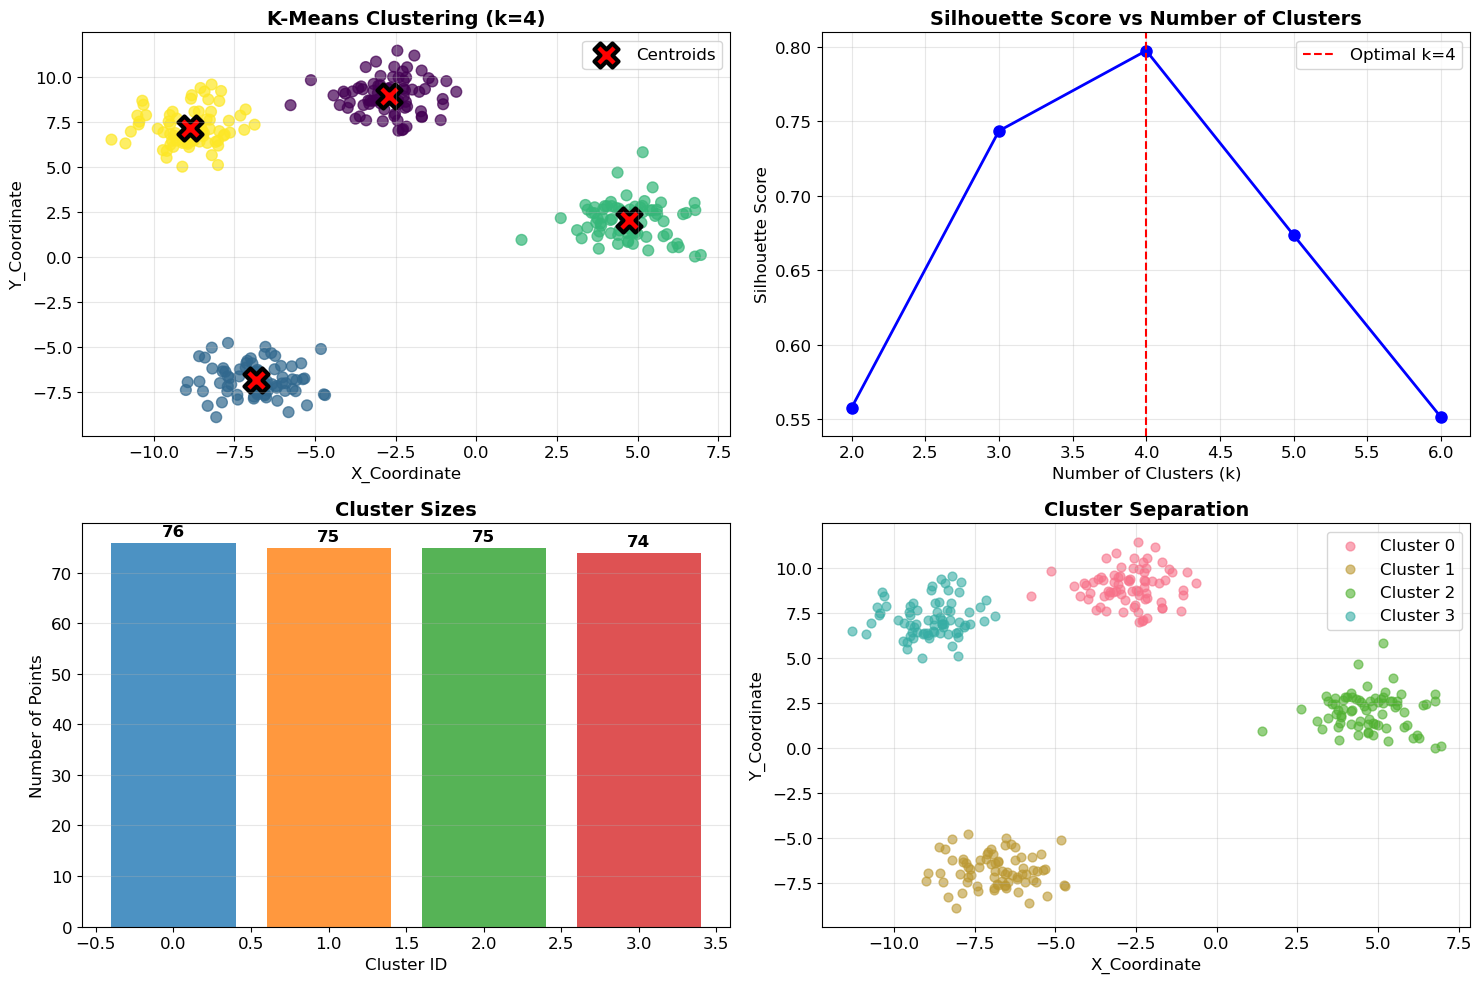

📊 Cluster Summary Statistics:


X_Coordinate                             Y_Coordinate                \
                mean    std     min    max count         mean    std    min   
Cluster                                                                       
0             -2.710  0.947  -5.759 -0.623    76        8.971  0.979  7.027   
1             -6.832  1.012  -9.004 -4.690    75       -6.830  0.898 -8.919   
2              4.718  1.040   1.399  6.955    75        2.042  1.014  0.021   
3             -8.874  0.919 -11.310 -6.874    74        7.175  0.996  5.022   

                       
            max count  
Cluster                
0        11.478    76  
1        -4.788    75  
2         5.826    75  
3         9.594    74


🎯 How to use these functions in your projects:

# 1. Quick clustering
results = quick_kmeans(your_data, k_range=(2, 8))

# 2. Visualize results  
plot_kmeans_results(your_data, results, feature_names=['feature1', 'feature2'])

# 3. Get cluster statistics
stats = cluster_summary_stats(your_data, results['labels'], feature_names)

# 4. Access results
best_k = results['best_k']
cluster_labels = results['labels']
model = results['model']
centroids = results['centroids']



In [19]:
# 🛠️ Reusable K-Means Functions Library
# Copy these functions to your projects for quick K-Means implementation

def quick_kmeans(X, k_range=(2, 10), scale_data=True, random_state=42):
    """
    Quick K-Means clustering with automatic k selection
    
    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Input data
    k_range : tuple, default=(2, 10)
        Range of k values to test
    scale_data : bool, default=True
        Whether to scale the data
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    dict : Dictionary containing results
        - 'best_k': Optimal number of clusters
        - 'labels': Cluster labels
        - 'model': Fitted KMeans model
        - 'silhouette': Silhouette score
        - 'centroids': Cluster centroids
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    
    # Preprocess data
    if scale_data:
        scaler = StandardScaler()
        X_processed = scaler.fit_transform(X)
    else:
        X_processed = X
        scaler = None
    
    # Find optimal k
    silhouette_scores = []
    k_values = range(k_range[0], k_range[1] + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=random_state)
        labels = kmeans.fit_predict(X_processed)
        score = silhouette_score(X_processed, labels)
        silhouette_scores.append(score)
    
    # Select best k
    best_idx = np.argmax(silhouette_scores)
    best_k = k_values[best_idx]
    
    # Fit final model
    final_model = KMeans(n_clusters=best_k, init='k-means++',n_init=20, random_state=random_state)
    final_labels = final_model.fit_predict(X_processed)
    
    # Prepare results
    results = {
        'best_k': best_k,
        'labels': final_labels,
        'model': final_model,
        'scaler': scaler,
        'silhouette': silhouette_scores[best_idx],
        'centroids': final_model.cluster_centers_,
        'inertia': final_model.inertia_,
        'all_scores': dict(zip(k_values, silhouette_scores))
    }
    
    return results

def plot_kmeans_results(X, results, feature_names=None, figsize=(15, 10)):
    """
    Create comprehensive visualization of K-Means results
    
    Parameters:
    -----------
    X : array-like
        Original input data
    results : dict
        Results from quick_kmeans function
    feature_names : list, optional
        Names of features for plotting
    figsize : tuple, default=(15, 10)
        Figure size
    """
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    labels = results['labels']
    
    # Plot 1: Cluster visualization (first two features)
    scatter = axes[0, 0].scatter(X[:, 0], X[:, 1], c=labels, 
                                cmap='viridis', alpha=0.7, s=60)
    
    # Add centroids if 2D
    if results['scaler'] is not None:
        centroids_orig = results['scaler'].inverse_transform(results['centroids'])
    else:
        centroids_orig = results['centroids']
    
    axes[0, 0].scatter(centroids_orig[:, 0], centroids_orig[:, 1], c='red', marker='X', s=300, linewidths=3,edgecolors='black', label='Centroids')
    
    axes[0, 0].set_title(f'K-Means Clustering (k={results["best_k"]})', 
                        fontweight='bold', fontsize=14)
    axes[0, 0].set_xlabel(feature_names[0] if feature_names else 'Feature 1')
    axes[0, 0].set_ylabel(feature_names[1] if feature_names else 'Feature 2')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Plot 2: Silhouette scores for different k
    k_values = list(results['all_scores'].keys())
    scores = list(results['all_scores'].values())
    
    axes[0, 1].plot(k_values, scores, 'bo-', linewidth=2, markersize=8)
    axes[0, 1].axvline(x=results['best_k'], color='red', linestyle='--', label=f'Optimal k={results["best_k"]}')
    axes[0, 1].set_title('Silhouette Score vs Number of Clusters', 
                        fontweight='bold', fontsize=14)
    axes[0, 1].set_xlabel('Number of Clusters (k)')
    axes[0, 1].set_ylabel('Silhouette Score')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # Plot 3: Cluster sizes
    unique, counts = np.unique(labels, return_counts=True)
    bars = axes[1, 0].bar(unique, counts, alpha=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:len(unique)])
    axes[1, 0].set_title('Cluster Sizes', fontweight='bold', fontsize=14)
    axes[1, 0].set_xlabel('Cluster ID')
    axes[1, 0].set_ylabel('Number of Points')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,str(count), ha='center', va='bottom', fontweight='bold')
    
    # Plot 4: Feature distributions by cluster
    if X.shape[1] >= 2:
        for cluster_id in unique:
            cluster_data = X[labels == cluster_id]
            axes[1, 1].scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.6, s=40, label=f'Cluster {cluster_id}')
        
        axes[1, 1].set_title('Cluster Separation', fontweight='bold', fontsize=14)
        axes[1, 1].set_xlabel(feature_names[0] if feature_names else 'Feature 1')
        axes[1, 1].set_ylabel(feature_names[1] if feature_names else 'Feature 2')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def cluster_summary_stats(X, labels, feature_names=None):
    """
    Generate summary statistics for each cluster
    
    Parameters:
    -----------
    X : array-like
        Input data
    labels : array-like
        Cluster labels
    feature_names : list, optional
        Names of features
    
    Returns:
    --------
    pandas.DataFrame : Summary statistics by cluster
    """
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
    
    df = pd.DataFrame(X, columns=feature_names)
    df['Cluster'] = labels
    
    summary = df.groupby('Cluster').agg(['mean', 'std', 'min', 'max', 'count']).round(3)
    
    print("📊 Cluster Summary Statistics:")
    print("=" * 60)
    display(summary)
    
    return summary

# 🚀 Demo of reusable functions
print("🧪 Testing Reusable Functions")
print("=" * 50)

# Quick K-Means implementation
results = quick_kmeans(X_ideal, k_range=(2, 6), scale_data=True)

print(f"✅ Quick K-Means completed!")
print(f"🎯 Optimal k        : {results['best_k']}")
print(f"📊 Silhouette score : {results['silhouette']:.4f}")
print(f"🔧 Inertia          : {results['inertia']:.4f}")

# Visualize results
plot_kmeans_results(X_ideal, results, feature_names=['X_Coordinate', 'Y_Coordinate'])

# Generate summary statistics
summary_stats = cluster_summary_stats(X_ideal, results['labels'], feature_names=['X_Coordinate', 'Y_Coordinate'])

print("\n🎯 How to use these functions in your projects:")
print("=" * 50)
print("""
# 1. Quick clustering
results = quick_kmeans(your_data, k_range=(2, 8))

# 2. Visualize results  
plot_kmeans_results(your_data, results, feature_names=['feature1', 'feature2'])

# 3. Get cluster statistics
stats = cluster_summary_stats(your_data, results['labels'], feature_names)

# 4. Access results
best_k = results['best_k']
cluster_labels = results['labels']
model = results['model']
centroids = results['centroids']
""")

---

## 🎯 **Conclusion & Next Steps**

<div style="background: linear-gradient(135deg, #11998e 0%, #38ef7d 100%); color: white; padding: 20px; border-radius: 10px; text-align: center; margin: 20px 0;">
<h3 style="margin: 0;">🎉 K-Means Mastery Complete!</h3>
<p style="margin: 10px 0 0 0; font-size: 16px;">You now have a comprehensive understanding of K-Means clustering</p>
</div>

### 📚 **What You've Learned:**
- ✅ **Conceptual Understanding**: When and why to use K-Means
- ✅ **Mathematical Foundation**: Objective function and algorithm mechanics  
- ✅ **Practical Implementation**: Production-ready code and pipelines
- ✅ **Evaluation Mastery**: Multiple metrics and validation techniques
- ✅ **Project Integration**: Real-world workflows and best practices
- ✅ **Reusable Tools**: Functions ready for your next project

### 🚀 **Next Learning Steps:**

1. **🔍 Explore Other Clustering Methods:**
   - DBSCAN (density-based clustering)
   - Hierarchical Clustering (tree-based clustering)
   - Gaussian Mixture Models (probabilistic clustering)

2. **📊 Advanced Techniques:**
   - Mini-batch K-Means for large datasets
   - K-Means++ initialization variants
   - Constrained clustering methods

3. **🏗️ Integration Projects:**
   - Customer segmentation dashboard
   - Image color quantization
   - Market basket analysis
   - Anomaly detection preprocessing

### 📖 **Additional Resources:**
- **Documentation**: [Scikit-learn K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- **Books**: "Hands-On Machine Learning" by Aurélien Géron
- **Papers**: "k-means++: The Advantages of Careful Seeding" (Arthur & Vassilvitskii, 2007)

---

<div style="background: #f8f9fa; padding: 15px; border: 2px dashed #6c757d; border-radius: 8px; margin: 20px 0; text-align: center;">
<h4 style="margin: 0 0 10px 0; color: #495057;">📝 Notebook Summary</h4>
<p style="margin: 0; color: #6c757d; font-style: italic;">
This notebook provides a complete reference for K-Means clustering, from theory to production implementation. 
Save it as your go-to resource for clustering projects!
</p>
</div>

**Happy Clustering! 🎯✨**